In [1]:
import numpy as np
import pandas as pd

df_train = pd.read_csv(r'../data/train_tokenized.csv')
df_test = pd.read_csv(r'../data/test_tokenized.csv')

df_train

,post,gender,tokenized,cleaned,cluster
0,What? No escape? I thought that I would be ab...,1,"['escape', 'thought', 'would', 'able', 'get', ...","['escape', 'thought', 'able', 'need', 'hear', ...",7
1,"And all I can say is Thank You, Thank You!!! ...",1,"['say', 'thank', 'thank', 'think', 'look', 'an...","['thank', 'thank', 'think', 'look', 'surgical'...",7
2,She is a very very sweet girl :)\n\nIts hardly...,1,"['sweet', 'girl', 'hardly', '2', 'month', 'sin...","['sweet', 'girl', 'hardly', 'month', 'start', ...",5
3,"I love what Brooke had to say about the event,...",1,"['love', 'brooke', 'say', 'event', 'also', 'ti...","['love', 'brooke', 'event', 'tidbit', 'advice'...",2
4,I have some photos I've been meaning to post f...,1,"['photo', 'ive', 'mean', 'post', 'david', 'rei...","['photo', 'mean', 'post', 'david', 'reid', 'lo...",2
...,...,...,...,...,...
2569,"So, on my long run of the week I like to conte...",1,"['long', 'run', 'week', 'like', 'contemplate',...","['long', 'run', 'week', 'like', 'contemplate',...",7
2570,Contact lenses require a certain degree of car...,0,"['contact', 'lenses', 'require', 'certain', 'd...","['contact', 'lense', 'require', 'certain', 'de...",2
2571,I didn't start watching AD until way after the...,1,"['didnt', 'start', 'watch', 'ad', 'way', 'show...","['start', 'watch', 'way', 'late', 'know', 'beg...",2
2572,"At Creation Moments, Ian Taylor starts by aski...",0,"['creation', 'moment', 'ian', 'taylor', 'start...","['creation', 'moment', 'ian', 'taylor', 'start...",7


### Load the model

In [2]:
import pickle

pipe = pickle.load(open('../models/NB_tfIdf.sav', 'rb')) # NB_countVec.sav

In [3]:
pipe

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('naive', MultinomialNB(alpha=0.1))])

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

In [5]:
pred = pipe.predict(df_test['tokenized'])
print(classification_report(y_true=df_test['gender'], y_pred=pred))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       335
           1       0.68      0.73      0.71       309

    accuracy                           0.71       644
   macro avg       0.71      0.71      0.71       644
weighted avg       0.71      0.71      0.71       644



In [6]:
from sklearn.metrics import accuracy_score, f1_score

print("Accuracy = " + str(accuracy_score(y_true=df_test['gender'], y_pred=pred)))
print("F1 score = " + str(f1_score(y_true=df_test['gender'], y_pred=pred, average='weighted')))

Accuracy = 0.7080745341614907
F1 score = 0.7081590074093822


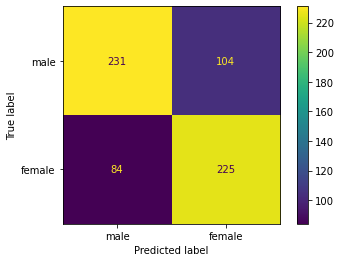

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(df_test['gender'], pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['male', 'female'])
disp.plot()
plt.grid(False)
plt.show()

### Test on the exploration blog data -> better than 50/50, but not as good as model that was trained on the exploration blog data (got 69%)

In [8]:
#df_test2 = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/gender_prediction/data/blogs_gender/test_tokenized.csv')
df_test2 = pd.read_csv(r'../../exploration_blogs_gender/data/test_tokenized.csv') #or training data

In [9]:
true2 = list(df_test2['gender'])

for i in range(len(true2)):
    if(true2[i] == 'male'):
        true2[i] = 0
    elif(true2[i] == 'female'):
        true2[i] = 1

In [10]:
pred2 = pipe.predict(df_test2['tokenized'])

In [11]:
print(classification_report(y_true=true2, y_pred=pred2))

print("Accuracy = " + str(accuracy_score(y_true=true2, y_pred=pred2)))
print("F1 score = " + str(f1_score(y_true=true2, y_pred=pred2, average='weighted')))

              precision    recall  f1-score   support

           0       0.65      0.50      0.57     66093
           1       0.58      0.72      0.64     63377

    accuracy                           0.61    129470
   macro avg       0.62      0.61      0.61    129470
weighted avg       0.62      0.61      0.61    129470

Accuracy = 0.6095852321001004
F1 score = 0.6052007250700305


### Access the Naive Bayes model and try to interpret some predictions

In [8]:
model = pipe['naive']
vec = pipe['vectorizer']
X = vec.transform(df_test.tokenized)

In [9]:
model.classes_

array([0, 1])

In [10]:
# this gives the probabilites / confidence that a sample belongs to class 0 (male) or class 1 (female) for each sample
probs = model.predict_proba(X)
print(probs)

[[0.31740621 0.68259379]
 [0.4031493  0.5968507 ]
 [0.97105652 0.02894348]
 ...
 [0.56595905 0.43404095]
 [0.45079087 0.54920913]
 [0.4211629  0.5788371 ]]


Looking at prediction and prediction probabilities of some samples

In [11]:
sample_id = 0

print(df_test.post[sample_id])
print(df_test.tokenized[sample_id])
print(df_test.gender[sample_id])

print(model.predict(X[sample_id]))
print(model.predict_proba(X[sample_id]))

perfect epitome of demagogue ..jus too senitive..pat on her back n she yells as though we hit her wit iron for ..too moody n short tempered lik moi....n can pul her leg to any xtent n entertain urselves ...al teachers fond of her ..(hw come aish)...helpful... strng in concepts she noes..jus has too many fans....perfect lab partner..while away tym either trying most complicated concepts(which we doubt if we act thought ourselves) or jus yawning n blabbing utter crap n talking like imbecile ppl ..awesom teacher she can bcome..al d seminars taken til date impressive n increased her fan club....btw hw can i forget abt d jarring lunch box..sema attractive da...n neva opens..nice ting for u 2 play wit..n ya wat an ice cream lover..major hand in comleting entire family pack ise cream..n requires no company..
['perfect', 'epitome', 'demagogue', 'jus', 'senitivepat', 'back', 'n', 'yell', 'though', 'hit', 'wit', 'iron', 'moody', 'n', 'short', 'temper', 'lik', 'moin', 'pul', 'leg', 'xtent', 'n', 

Store an array of all feature names, and the class probabilites for each feature

In [12]:
feat_names = vec.get_feature_names_out()
feat_probs = model.feature_log_prob_

In [13]:
print(feat_names.shape) # array of length nr. of features
print(feat_probs.shape) # matrix of size (nr. of classes, nr. of features)

(474488,)
(2, 474488)


In [14]:
# print the name and class probabilities of one feature
idx = 10000
print(feat_names[idx])
print(feat_probs[:,idx])

abundant type
[-13.40250362 -13.19505264]


In [15]:
max_diff = 0
max_idx = 0
for i in range(feat_probs.shape[1]):
  diff = np.abs(feat_probs[0,i] - feat_probs[1,i])
  if(diff > max_diff):
    max_diff = diff
    max_idx = i

In [16]:
print(max_idx)
print(max_diff)
print(feat_names[max_idx])
print(feat_probs[:,max_idx])

427940
3.2215934654899883
topps
[-10.16022984 -13.3818233 ]


### Now: take a data sample, get the feature indices and then look at the class probabilities for the features

In [17]:
from scipy.sparse.csc import csc_matrix

# probably requires some back-and-forth from the vectorizer outputs (that have indices???) to the feature names?
i = 0
print(df_test.post[i])
print(df_test.tokenized[i])
print(df_test.gender[i]) # 0 = male, 1 = female
print(probs[0]) # probability that text is male (18%) vs. female (82%)

perfect epitome of demagogue ..jus too senitive..pat on her back n she yells as though we hit her wit iron for ..too moody n short tempered lik moi....n can pul her leg to any xtent n entertain urselves ...al teachers fond of her ..(hw come aish)...helpful... strng in concepts she noes..jus has too many fans....perfect lab partner..while away tym either trying most complicated concepts(which we doubt if we act thought ourselves) or jus yawning n blabbing utter crap n talking like imbecile ppl ..awesom teacher she can bcome..al d seminars taken til date impressive n increased her fan club....btw hw can i forget abt d jarring lunch box..sema attractive da...n neva opens..nice ting for u 2 play wit..n ya wat an ice cream lover..major hand in comleting entire family pack ise cream..n requires no company..
['perfect', 'epitome', 'demagogue', 'jus', 'senitivepat', 'back', 'n', 'yell', 'though', 'hit', 'wit', 'iron', 'moody', 'n', 'short', 'temper', 'lik', 'moin', 'pul', 'leg', 'xtent', 'n', 

In [18]:
features = []
female_prob = []
male_prob = []
feat_idxs = X[i].nonzero()[1]

for f in feat_idxs:
  features.append(feat_names[f])
  female_prob.append(feat_probs[1,f])
  male_prob.append(feat_probs[0,f])

print(features)
print(female_prob)
print(male_prob)

['yell', 'yawn', 'ya', 'xtent', 'wit', 'wat', 'utter crap', 'utter', 'tym', 'try complicate', 'try', 'ting', 'til date', 'til', 'though', 'think', 'temper', 'teacher', 'talk like', 'talk', 'take', 'short temper', 'short', 'seminar', 'require', 'pul', 'ppl', 'play', 'perfect', 'pack', 'neva', 'moody', 'many', 'lunch', 'like', 'lik', 'leg', 'lab', 'jus', 'jar', 'iron', 'increase', 'impressive', 'ice cream', 'ice', 'hw', 'hit', 'hand', 'forget', 'fond', 'fan', 'family pack', 'family', 'epitome', 'entire family', 'entire', 'entertain', 'either', 'doubt', 'demagogue', 'date', 'dan', 'cream', 'crap', 'concept', 'complicate', 'company', 'come', 'back yell', 'back', 'away', 'attractive', 'al', 'act think', 'act', 'abt']
[-11.322978565173466, -12.761248992401494, -10.959628032212944, -12.800393028194799, -11.059937008250394, -10.753176355022259, -12.90519271857975, -12.224739681278002, -12.368405022781781, -13.381823304860278, -8.987920738871617, -12.778405469475794, -12.754542459580767, -11.54

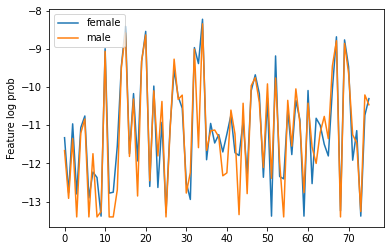

In [19]:
plt.plot(female_prob, label="female")
plt.plot(male_prob, label="male")
plt.ylabel('Feature log prob')
plt.legend()
plt.show()

In [20]:
# Maybe it could be interesting here to then investigate the features that were very different? So where the two lines have the biggest gap?

### Global interpretation

In [21]:
feature_df = pd.DataFrame(columns=['feature', 'female', 'male', 'diff'])

feature_df['feature'] = feat_names
feature_df['female'] = feat_probs[1,:]
feature_df['male'] = feat_probs[0,:]
feature_df['diff'] = np.abs(feat_probs[1,:]) - np.abs(feat_probs[0,:])

feature_df

,feature,female,male,diff
0,00,-13.262946,-13.058440,0.204507
1,00 httpifitshipitshereblogspotcomfeedspostsdef...,-13.252596,-13.402504,-0.149907
2,00 northeast10,-13.381823,-13.141407,0.240416
3,00 oft,-13.381823,-13.262363,0.119461
4,000,-13.381823,-13.171364,0.210459
...,...,...,...,...
474483,ℓιƒє яαтнєя,-13.381823,-12.818585,0.563239
474484,ℓινє,-13.381823,-12.818585,0.563239
474485,ℓινє ωιтнσυт,-13.381823,-12.818585,0.563239
474486,不好意思,-13.224400,-13.402504,-0.178104


Top features that indicate male vs. female authors

In [22]:
N_FEAT = 50

In [23]:
top_female = feature_df.sort_values(by=['female'], ascending=False).iloc[:N_FEAT]
print(top_female.head())
print("")
print(list(top_female.feature))

       feature    female      male      diff
170658     get -8.027635 -8.204677 -0.177042
175042      go -8.112798 -8.308025 -0.195227
292287     one -8.135924 -8.179783 -0.043858
423278    time -8.197339 -8.312463 -0.115124
203834      im -8.208267 -8.728324 -0.520057

['get', 'go', 'one', 'time', 'im', 'make', 'like', 'know', 'day', 'think', 'love', 'would', 'say', 'really', 'year', 'take', 'want', 'thing', 'well', 'see', 'work', 'dont', 'people', 'life', 'come', 'good', 'new', 'even', 'little', 'way', 'look', 'back', 'much', 'friend', 'school', 'feel', 'week', 'also', 'ive', 'use', 'never', 'need', 'first', 'could', 'last', 'give', 'start', 'find', 'always', 'many']


In [24]:
top_male = feature_df.sort_values(by=['male'], ascending=False).iloc[:N_FEAT]
print(top_male.head())
print("")
print(list(top_male.feature))

       feature    female      male      diff
292287     one -8.135924 -8.179783 -0.043858
170658     get -8.027635 -8.204677 -0.177042
175042      go -8.112798 -8.308025 -0.195227
423278    time -8.197339 -8.312463 -0.115124
237565    like -8.214058 -8.335273 -0.121215

['one', 'get', 'go', 'time', 'like', 'make', 'say', 'know', 'would', 'think', 'people', 'thing', 'year', 'good', 'see', 'take', 'work', 'use', 'day', 'new', 'well', 'want', 'im', 'first', 'come', 'look', 'find', 'way', 'also', 'back', 'need', 'much', 'even', 'life', 'game', 'give', 'dont', 'really', 'start', 'great', 'last', 'could', 'many', 'two', 'show', 'try', 'write', 'friend', 'something', 'guy']


The two previous lists share many words (very common words), so let's rather see which features have the greatest gap / probability difference. I.e., which features are more likely to belong to only class than the other

In [25]:
most_likely_female = feature_df.sort_values(by=['diff'], ascending=True).iloc[:N_FEAT]
print(most_likely_female.head())
print("")
print(list(most_likely_female.feature))

             feature     female       male      diff
361512  school lunch -10.182725 -13.402504 -3.219779
356689       sahuayo -10.624469 -13.402504 -2.778035
194976          hive -10.959205 -13.402504 -2.443299
371695        sharon -10.867790 -13.305953 -2.438163
230780        lavada -11.010381 -13.402504 -2.392123

['school lunch', 'sahuayo', 'hive', 'sharon', 'lavada', 'alzheimers', 'mascara', 'eyeshadow', 'jacob', 'wedding', 'egg', 'lunch', 'straightener', 'etsy', 'sudan', 'guinea pig', 'hatch', 'botox', 'nui', 'cupcake', 'randa', 'darfur', 'patty', 'straighten', 'kid love', 'selfish', 'rapa nui', 'rapa', 'mr man', 'coral', 'fabulous', 'hubby', 'bubby', 'jet blue', 'salud', 'kusina', 'kusina salud', 'disney cruise', 'nbspi', 'start blog', 'kindergarten', 'mum', 'planner', 'quilt', 'edal', 'yellowstone', 'cdo', 'garlic', 'absolutely love', 'spring break']


In [26]:
most_likely_male = feature_df.sort_values(by=['diff'], ascending=False).iloc[:N_FEAT]
print(most_likely_male.head())
print("")
print(list(most_likely_male.feature))

        feature     female       male      diff
427940    topps -13.381823 -10.160230  3.221593
80792   cluster -13.381823 -10.704264  2.677560
367387   senate -13.269266 -10.695302  2.573964
258933   mccain -13.381823 -10.855620  2.526203
114587     digg -13.381823 -10.857506  2.524317

['topps', 'cluster', 'senate', 'mccain', 'digg', 'mcgriff', 'metroid', 'raines', 'kosovo', 'baseball card', 'liverpool', 'nbc', 'ipad', 'directx', 'wii', 'cricket', 'sticker', 'broadband', 'xbox', 'mario', 'ipl', 'python', 'separation', 'mets', 'fred', 'spine', 'drillard', 'legal separation', 'formal legal', 'therizinosaurus', 'thirdparty', 'kombu', 'therizinosaurs', 'obama', 'mccullum', 'parody', 'ironpython', 'user', 'nuclear', 'goalie', 'serbia', 'bishkek', 'unemployed', 'fred mcgriff', 'frnds', 'super mario', 'john mccain', 'woodpecker', 'arsenal', 'sensor']
